<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

# Part 1:- Probability Distributions

## Problem Statement 1:
Investment Advisors agree that near retirees, defined as people aged 55 to 65, should have balanced portfolios. Most advisors suggest that the near –retirees have no more than 50% of their investments in stocks. However, during the huge decline in the stock market in 2008, 22% of near retirees had 90% or more of their investments in stocks.
Suppose you have a random sample of 10 people who have labeled as near retirees in 2008.

### Question 1.1: Define the random variable and the corresponding probability distribution that this random variable follows.

In [213]:
"""Random variable is a variable whose values depend on outcomes of a random phenomenon. In this problem the random variable is
number of people in the stock investement """
n = 10
p = 0.22

'Random variable is a variable whose values depend on outcomes of a random phenomenon. In this problem the random variable is\nnumber of people in the stock investement '

In [214]:
"The distribution is Binomial distribution"

'The distribution is Binomial distribution'

### Question 1.2: What is the probability that during 2008 zero near retirees had 90% or more of their investments in stocks?

In [215]:
from scipy.stats import binom
print(binom.pmf(0, 10, 0.22))

0.083357758312362


### Question 1.3: What is the probability that during 2008 exactly one near retiree had 90% or more of his investments in stocks?

In [216]:
print(binom.pmf(1, 10, 0.22))

0.23511162600922644


### Question 1.4: What is the probability that during 2008 two or fewer near retirees had 90% or more of their investment in stocks?


In [217]:
print(binom.cdf(2, 10, 0.22))

0.6168802942563754


## Problem Statement 2
Assume that number of network errors experienced in a day on a local area network (LAN) is distributed as a Poisson random variable. The mean number of network errors experienced in a day is 2.4.

### Question 2.1: Define the random variable and the corresponding probability distribution that this random variable follows.

In [218]:
"The random variable is Network error experienced in a day"
Mean = 2.4

In [219]:
"The distribution is Poisson distribution"

'The distribution is Poisson distribution'

### Question 2.2: What is the probability that in any given day zero network errors will occur?

In [220]:
from scipy.stats import poisson
poisson.pmf(0, 2.4)

0.09071795328941251

### Question 2.3: What is the probability that in any given day exactly one network error will occur?

In [221]:
poisson.pmf(1, 2.4)

0.21772308789459

### Question 2.4: What is the probability that in any given day two or more network errors will occur?

In [222]:
print(1 - (poisson.cdf(1, 2.4)))


0.6915589588159976


# Part 2:- Health Insurance Cost Prediction 

### Data Set - 

Domain: Finance, Insurance

Data: https://www.kaggle.com/teertha/ushealthinsurancedataset

#### Features

1. age
2. sex
3. bmi
4. children
5. smoker
6. region
7. charges

 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

###Objective-
To predict the individual's health cost based on individual's above mentioned features

## Steps to perform:

#### 1. Import Libraries
#### 2. Import Dataset and exploration
#### 3. Basic EDA
#### 4. Statistical analysis and Hypothesis testing

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -


## 1. Import all the necessary libraries

In [223]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
sns.set() #setting the default seaborn style for our plots
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import copy



## 2. Import Dataset and exploration

In [224]:
data = pd.read_csv(r'D:\D\AI\Great learning 2021\Assignment\Lab statistics\insurance.csv')

#### Check the first and last 5 samples of the dataframe and get familiar with the data

In [225]:
print(data.head(), "\n\n", data.tail())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520 

       age     sex    bmi  children smoker     region     charges
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603


## 3. Basic EDA

#### Find the shape of the data and the data type of individual columns

In [226]:
print(data.shape)

print(data.dtypes)

(1338, 7)
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


#### Check the presence of missing values

In [227]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Check the descriptive stats of numerical columns

In [228]:
data.describe()

# Findings
# 1. Age looks true representation of population as it range between 18 to 64
# Age and BMI is almost uniquely distributed
# More than 50% are over weight
# Almost 75% people have less children
# Charges column is highly skew

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Find the distribution of numerical columns and the asssociated skeweness.

Text(0.5, 0, 'Charges')

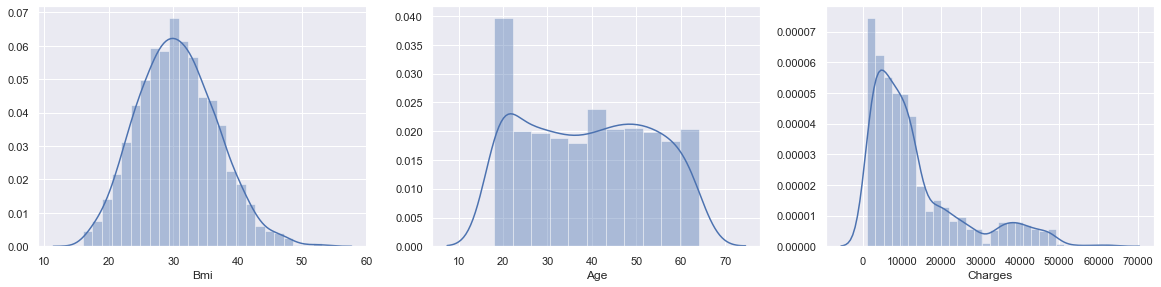

In [229]:
plt.figure(figsize = (20,15))
plt.subplot(3,3,1)
sns.distplot(data.bmi)
plt.xlabel("Bmi")

plt.subplot(3,3,2)
sns.distplot(data.age)
plt.xlabel("Age")

plt.subplot(3,3,3)
sns.distplot(data.charges)
plt.xlabel("Charges")

# Bmi is almost Normally distributed, Age is uniformly distributed, Charges is right skewed

In [230]:
data[['age','charges','bmi']].skew()

age        0.055673
charges    1.515880
bmi        0.284047
dtype: float64

#### Check the presence of outlier values

Text(0.5, 0, 'Charges')

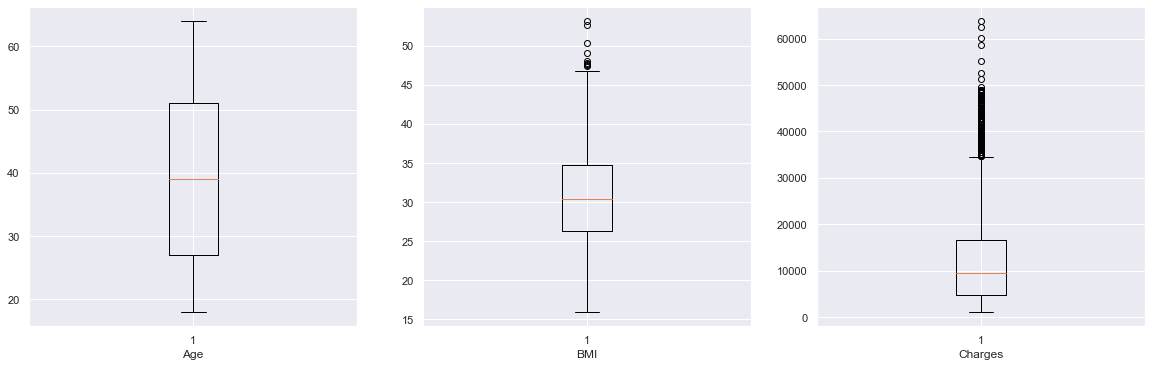

In [231]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
plt.boxplot(data['age'])
plt.xlabel("Age")

plt.subplot(3,3,2)
plt.boxplot(data['bmi'])
plt.xlabel("BMI")

plt.subplot(3,3,3)
plt.boxplot(data['charges'])
plt.xlabel("Charges")

# For BMI there are few outliers above 47
#Charges oulier is present above 35000
# No outliers for Age

#### Check the distribution of categorical columns

Text(0.5, 0, 'Region')

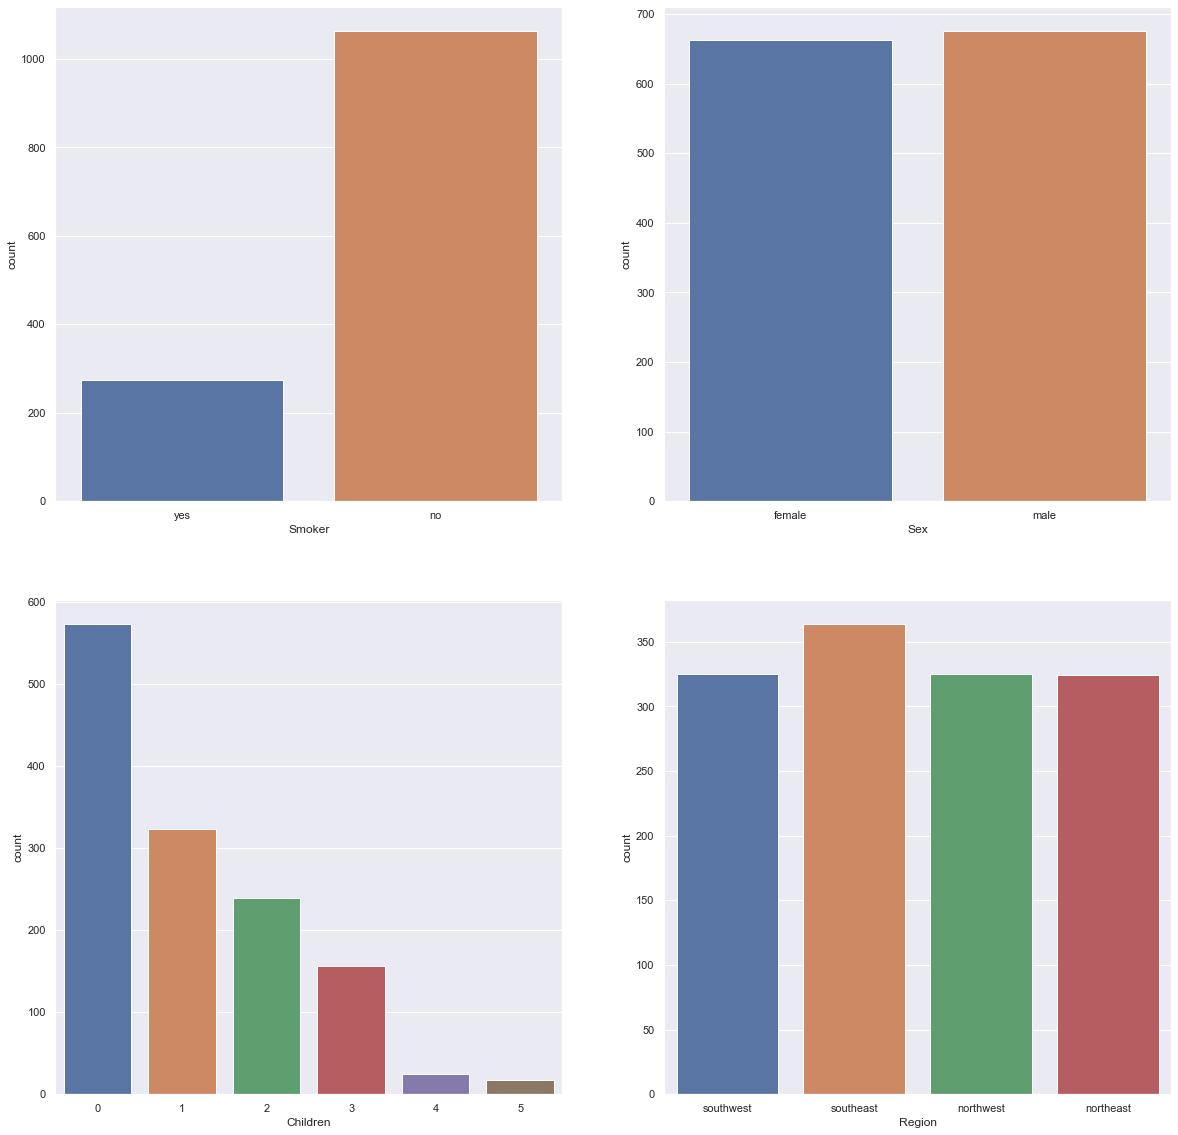

In [232]:
# Sex, children, smoker, region
plt.figure(figsize = (20,20))
plt.subplot(2,2,1)
sns.countplot(data.smoker)
plt.xlabel("Smoker")

plt.subplot(2,2,2)
sns.countplot(data.sex)
plt.xlabel("Sex")

plt.subplot(2,2,3)
sns.countplot(data.children)
plt.xlabel("Children")

plt.subplot(2,2,4)
sns.countplot(data.region)
plt.xlabel("Region")

In [233]:
# Gender is equally distributed
# More instances for children <=2
# Region is equally distributed
# Lot more non smokers in the data

#### Check the Bi-variate distribution of every possible attribute pair

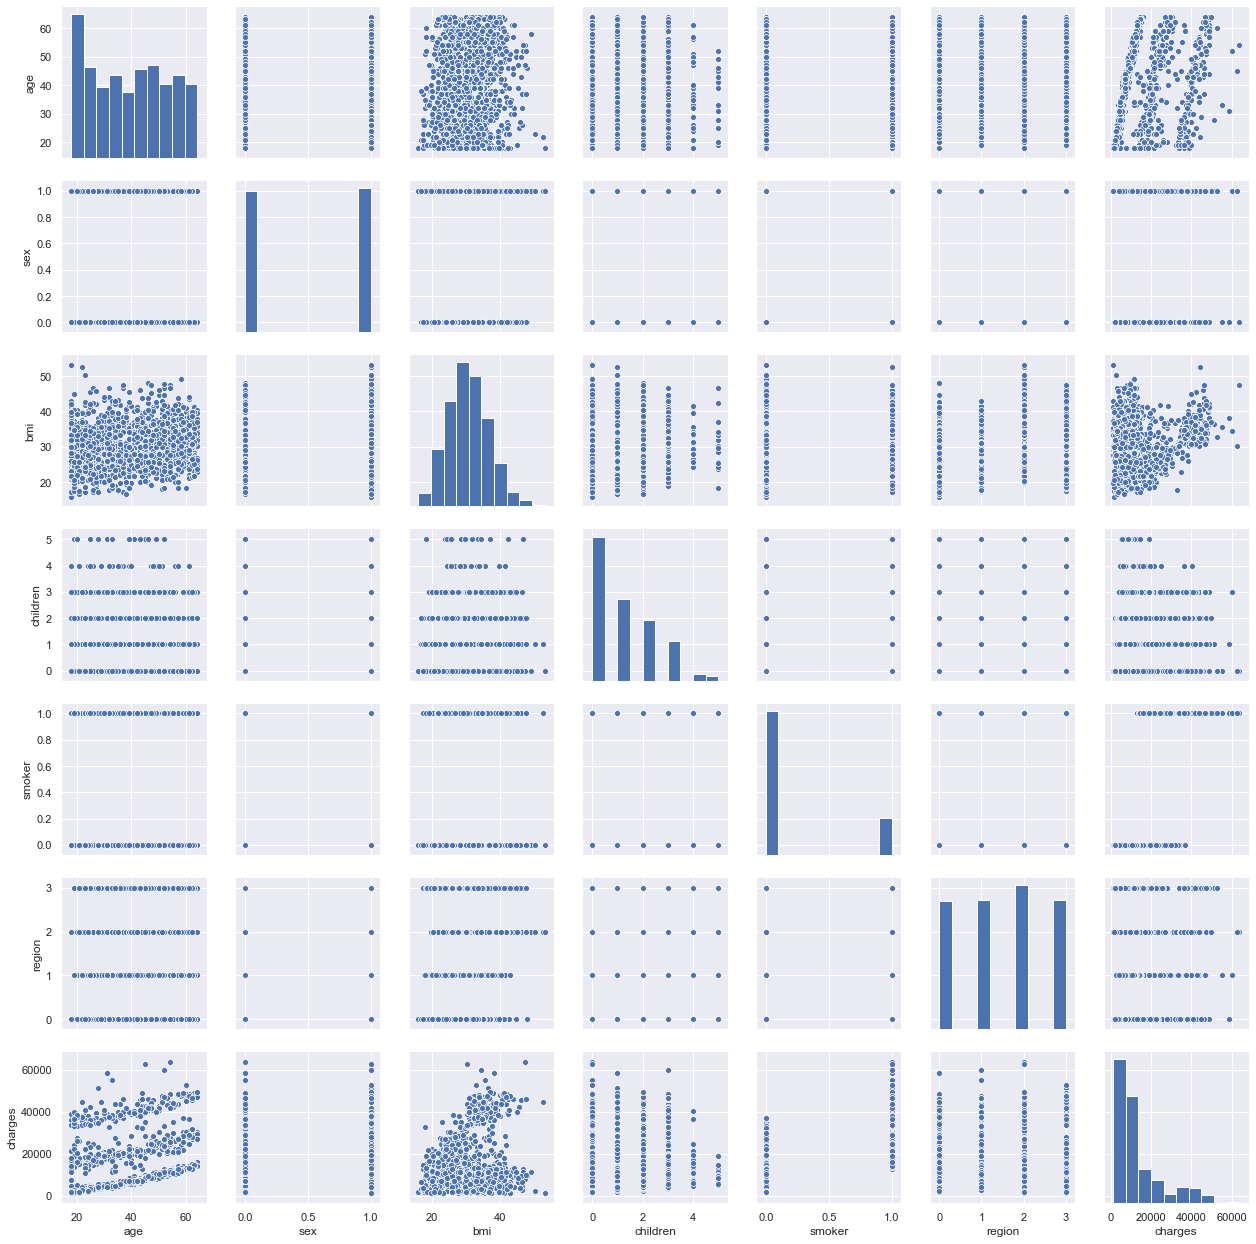

In [234]:
data_encoded = copy.deepcopy(data)
le = LabelEncoder()
data_encoded[['sex', 'smoker', 'region']] = data_encoded[['sex', 'smoker', 'region']].apply(le.fit_transform)
sns.pairplot(data_encoded)

In [235]:
data_encoded.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


## 4. Statistical analysis and Hypothesis testing
- Use appropriate hypothesis test for answering below questions

#### Check if the charges of people who smoke differ significantly from the people who don't?

In [236]:
from    scipy.stats             import  ttest_1samp,ttest_ind, wilcoxon, ttest_ind_from_stats
import  scipy.stats             as      stats  
from    statsmodels.stats.power import  ttest_power
import  matplotlib.pyplot       as      plt

In [237]:
smoker = data[data.smoker == "yes"]["charges"]
Nonsmoker = data[data.smoker == "no"]["charges"]
print(data.smoker.value_counts())
print(len(smoker))
print(len(Nonsmoker))

no     1064
yes     274
Name: smoker, dtype: int64
274
1064


In [238]:
# Null hypothesis: Mean of smoker - Mean of non smoker = 0
# Alternate hypothesis: Mean of smoker - Mean of non smoker is not equal to 0
# Significance value is 5%
# We use two sampled t test

t_statistic, p_value  =  stats.ttest_ind(smoker,Nonsmoker)
print('P Value', p_value)   

print("Since p value is less than 5% we reject Null hypothesis and accept alternate hypothesis. So there is significant difference in charges in smoker vs non smoker")

P Value 8.271435842177219e-283
Since p value is less than 5% we reject Null hypothesis and accept alternate hypothesis. So there is significant difference in charges in smoker vs non smoker


#### Does bmi of males differ significantly from that of females?

In [239]:
Male_bmi = data[data.sex == "male"]["bmi"]
Female_bmi = data[data.sex == "female"]["bmi"]
print(data.sex.value_counts())
print(len(Male_bmi))
print(len(Female_bmi))

male      676
female    662
Name: sex, dtype: int64
676
662


In [240]:
# Null hypothesis: Mean of Male_bmi - Mean of Female_bmi = 0
# Alternate hypothesis: Mean of Male_bmi - Mean of Female_bmi is not equal to 0
# Significance value is 5%
# We use two sampled t test

t_statistic, p_value  =  stats.ttest_ind(Male_bmi,Female_bmi)
print('P Value', p_value)   

print("Since p value is more than 5% we accept Null hypothesis and say that bmi of male and bmi of female does not differ")

P Value 0.08997637178984932
Since p value is more than 5% we accept Null hypothesis and say that bmi of male and bmi of female does not differ


#### Check if gender affects bmi

In [241]:
Male_bmi = data[data.sex == "male"]["bmi"]
Female_bmi = data[data.sex == "female"]["bmi"]
print(data.sex.value_counts())
print(len(Male_bmi))
print(len(Female_bmi))

male      676
female    662
Name: sex, dtype: int64
676
662


In [242]:
# Null hypothesis: Mean of Male_bmi - Mean of Female_bmi = 0
# Alternate hypothesis: Mean of Male_bmi - Mean of Female_bmi is not equal to 0
# Significance value is 5%
# We use two sampled t test

t_statistic, p_value  =  stats.ttest_ind(Male_bmi,Female_bmi)
print('P Value', p_value)   

print("Since p value is more than 5% we accept Null hypothesis and say that bmi of male and bmi of female does not differ")

P Value 0.08997637178984932
Since p value is more than 5% we accept Null hypothesis and say that bmi of male and bmi of female does not differ


#### Is the proportion of smokers significantly different in different genders?

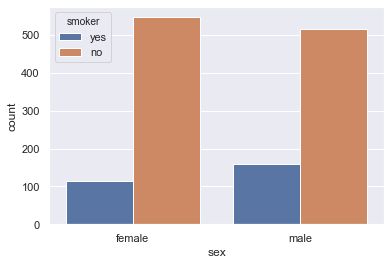

In [243]:
sns.countplot(data.sex, hue = data.smoker)

In [244]:
data_crosstab = pd.crosstab(data['sex'],
                            data['smoker'], 
                               margins = False)
print(data_crosstab)

smoker   no  yes
sex             
female  547  115
male    517  159


In [245]:
# Null hypothesis: There is no difference in proportion of smokers by male and female
# Alternate hypothesis: There is difference in proportion of smokers by male and female
# Significance value is 5%
# We use chi square test

In [246]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(data_crosstab)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

print("Since p value is less than significance value we reject null hypothesis and accept alternate hypothesis. So there is difference in proportion of smokers by male and female") 

Chi-square statistic 7.39291 P value 0.006548 Degrees of freedom 1
Since p value is less than significance value we reject null hypothesis and accept alternate hypothesis. So there is difference in proportion of smokers by male and female


#### Check if smoking habits are different for people of different regions

In [247]:
data_crosstab = pd.crosstab(data['smoker'],
                            data['region'], 
                               margins = False)
print(data_crosstab)

region  northeast  northwest  southeast  southwest
smoker                                            
no            257        267        273        267
yes            67         58         91         58


In [248]:
# Null hypothesis: There is no difference in smoking habits of people in different region
# Alternate hypothesis: There is difference in smoking habits of people in different region
# Significance value is 5%
# We use chi square test

In [249]:
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(data_crosstab)

print('Chi-square statistic %3.5f P value %1.6f Degrees of freedom %d' %(chi_sq_Stat, p_value,deg_freedom))

print("Since P value is greater than significance value we accept null hypothesis so there is no difference in smoking habits of people in different region")

Chi-square statistic 7.34348 P value 0.061720 Degrees of freedom 3
Since P value is greater than significance value we accept null hypothesis so there is no difference in smoking habits of people in different region


#### Is the distribution of bmi across women with no children, one child and two children, the same ?

In [250]:
data.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [252]:
# Null hypothesis: Distribution of bmi across women with no children, one child and two children is same 
# Alternate hypothesis: Distribution of bmi across women with no children, one child and two children is not same 
# Significance value is 5%
# We use Anova test

In [253]:
data_female = data[data["sex"] == "female"]

zero = data_female[data_female["children"] == 0]["bmi"]
one = data_female[data_female["children"] == 1]["bmi"]
two = data_female[data_female["children"] == 2]["bmi"]

In [254]:
fvalue, pvalue = stats.f_oneway(zero, one, two)
print(pvalue)
print("Since p value is greater than significance level we accept null hypothesis. So Distribution of bmi across women with no children, one child and two children is same")

0.7158579926754841
Since p value is greater than significance level we accept null hypothesis. So Distribution of bmi across women with no children, one child and two children is same
